In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
work_dir = os.environ['WORK']

In [197]:
ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', transform=transform)
print(len(ds))
# ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', split='val', transform=transform)
# print(len(ds))

1281167


In [25]:
transform = transforms.Compose([
    # transforms.CenterCrop(10),
#     transforms.Resize((224, 224)),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])
# transform = transforms.Compose([
# #     transforms.Scale(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])


In [35]:
ds = torchvision.datasets.CIFAR10(f'{work_dir}/datasets/cifar10/', transform=transform)
dl = DataLoader(ds, batch_size=1000, shuffle=False, num_workers=1)
start = time.time()
for x, y in dl:
    pass
print(time.time()-start)

dl = DataLoader(ds, batch_size=1000, shuffle=False, num_workers=16)
start = time.time()
for x, y in dl:
    pass
print(time.time()-start)

9.531633853912354
1.343893051147461


0 2.5249321460723877
1 2.736205577850342
2 3.142740249633789
3 2.7670605182647705
4 3.2208828926086426
5 3.2113027572631836
6 3.195681095123291
7 3.175494909286499
8 3.193513870239258
9 3.30902361869812
10 3.216702461242676
11 3.155211925506592
12 3.0984272956848145
13 3.722460985183716
14 3.386932849884033
15 3.415804147720337


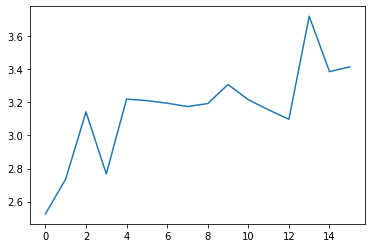

In [27]:
ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', transform=transform)
# ds = torchvision.datasets.CIFAR10(f'{work_dir}/datasets/cifar10/', transform=transform)

times = []
for n in range(0, 16):
    dl = DataLoader(ds, batch_size=100, shuffle=False, num_workers=n)
    start = time.time()
    x, y = next(iter(dl))
    end = time.time()
    t = end-start
    times.append(t)
    print(n, t)
plt.plot(times)
plt.show()

30 American bullfrog


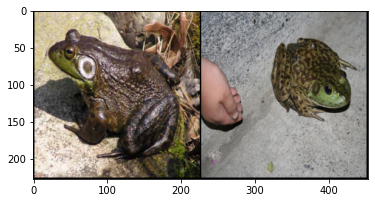

In [177]:
y_idx = scipy.stats.mode(y).mode[0]
y_idx = 30
xp = x[y==y_idx]
print(y_idx, labels[y_idx])
plt.imshow(torchvision.utils.make_grid(xp).permute(1, 2,0).numpy())
plt.show()